# Importing Libraries:

In [1]:
# Get Data from DVC remote
import dvc.api
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import mlflow
import mlflow.sklearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Initiating Logging

In [34]:
import logging
logging.basicConfig(filename='steps.log', encoding='utf-8', level=logging.INFO)
logging.info('This log file records the steps for this project')

# Importing Scripts

In [3]:
import sys, os 
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
# Import plot scripts
from plot import *
# Import utility scripts
from data_cleaner import *

In [4]:
util = Clean_Data()

Utility Functions Imported!!!


In [35]:
logging.info('Utility Functions Created for this project\
and required Libraries are Imported')

# Get data from DVC remote:

In [6]:
# Function to get data from DVC remote:
def data_from_DVC(path, repo, version):
    data_url = dvc.api.get_url(
        path=path,
        repo=repo,
        rev=version,
        remote='dvc-remote'
    )
    return pd.read_csv(data_url, sep=',')

In [ ]:
# Read the store data from remote repo
store_db = data_from_DVC('data/store.csv','git@github.com:Theehawau/Sales-Prediction.git','v1',)
store_db.head(2)

In [ ]:
# Read the train data from remote repo
train_db = data_from_DVC('data/train.csv','git@github.com:Theehawau/Sales-Prediction.git','v1')
train_db.head(2)

In [7]:
test_db = data_from_DVC('data/test.csv','git@github.com:Theehawau/Sales-Prediction.git','v1')
test_db.head(2)

In [ ]:
logging.info('Data is read from DVC remote')

# Get data from .csv files

In [5]:
store_db = util.read_data('../data/store.csv')
store_db.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [10]:
train_db = util.read_data('../data/train.csv')
train_db.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [7]:
test_db = util.read_data('../data/test.csv')
test_db.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [36]:
logging.info('Data is read from data folder')

# Data exploration and cleaning

In [10]:
train_db.shape

(1017209, 9)

In [37]:
logging.info(f'Training DataSet contains {train_db.shape[0]} rows\
and {train_db.shape[1]} columns')

In [11]:
train_db.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
train_db.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [30]:
train_db.columns.to_list()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [31]:
train_db.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
store_db.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [15]:
store_db.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
len(store_db[store_db['Promo2'] == 0])

544

In [17]:
store_db[store_db['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [18]:
test_db.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [19]:
test_db.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [20]:
test_db[test_db['Open'].isna()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


# Cleaning dataset

Filling null values for store dataset:

In [15]:
util.fill_null('Promo2SinceWeek',store_db,0)
util.fill_null('Promo2SinceYear',store_db,0)
util.fill_null('PromoInterval',store_db,0)
util.fill_null('CompetitionDistance',store_db,0)
util.fill_null('Open',test_db,1)

In [38]:
logging.info('Null values in Store dataset were filled with 0')

In [8]:
test_db.isna().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Changing data types:
1. Converting Object date to datetime format
2. Converting float to int

In [16]:
# Change to datetime
util.to_datetime(test_db, 'Date', '%Y-%m-%d')
util.to_datetime(train_db,'Date', '%Y-%m-%d')

In [39]:
logging.info('Date columns in test and train dataset were converted to datetime datatype')

In [17]:
# Change data type
util.convert_type(store_db,'Promo2SinceYear',int)
util.convert_type(train_db,'StateHoliday',str)

In [40]:
logging.info('Promo2SinceYear column in store_db was converted to int datatype')

Mergin Store and Train dataset:

In [18]:
db = pd.merge(left=train_db,right=store_db,on='Store',how='inner')
db.shape

(1017209, 18)

In [47]:
test = pd.merge(left=test_db,right=store_db,on='Store',how='inner')

In [41]:
logging.info('Train and Store Dataset were merged on Store with Inner join')

In [19]:
db.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
976760,1071,3,2013-10-16,4463,614,1,0,0,1,a,a,820.0,3.0,2012.0,1,35.0,2012,"Mar,Jun,Sept,Dec"
684002,752,5,2015-04-10,3757,382,1,0,0,1,a,a,970.0,3.0,2013.0,1,31.0,2013,"Feb,May,Aug,Nov"
935335,1026,4,2014-09-04,9622,1158,1,1,0,0,c,a,450.0,6.0,2011.0,1,48.0,2012,"Mar,Jun,Sept,Dec"
961970,1055,7,2014-07-13,0,0,0,0,0,0,c,a,1980.0,4.0,2009.0,0,0.0,0,0
604171,663,3,2013-05-15,3226,477,1,1,0,0,a,c,7860.0,5.0,2005.0,0,0.0,0,0


# Checking promo distribution for test and train datasets

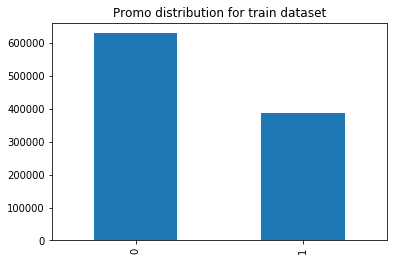

In [21]:
db['Promo'].value_counts().plot(kind='bar',title='Promo distribution for train dataset')


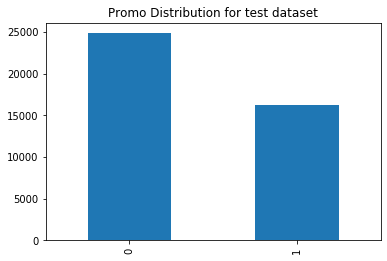

In [22]:
test_db['Promo'].value_counts().plot(kind='bar',title='Promo Distribution for test dataset')

# Inference:

From the plots the distribution of promo is similar for the train and test datasets

In [42]:
logging.info('Check promo distribution for test and train datasets')

# Exploring Sales and Holiday

Number of Customers vs State Holiday:

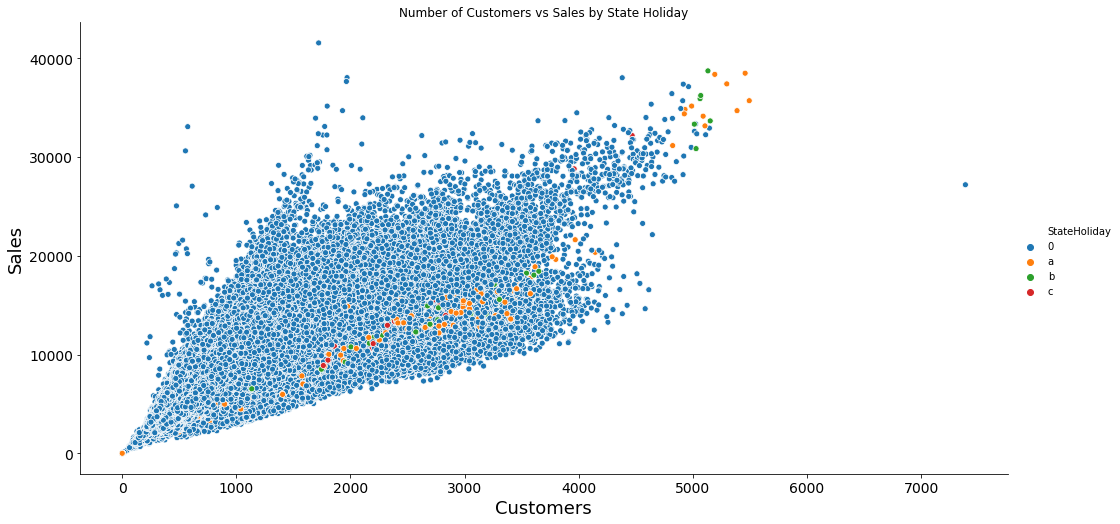

In [19]:
scatter_plot("Customers","Sales",db,'Number of Customers vs Sales by State Holiday',"StateHoliday")

In [21]:
# Getting Christmas sales
xmas_sales = db[db['StateHoliday'] == 'c']

In [22]:
util.to_datetime(xmas_sales,'Date', '%Y-%m-%d')

In [29]:
xmas_sales.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
217,1,5,2014-12-26,0,0,0,0,c,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
218,1,4,2014-12-25,0,0,0,0,c,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
582,1,4,2013-12-26,0,0,0,0,c,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
583,1,3,2013-12-25,0,0,0,0,c,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0
1159,2,5,2014-12-26,0,0,0,0,c,1,a,a,570.0,11.0,2007.0,1,13.0,2010,"Jan,Apr,Jul,Oct"


In [23]:
# Creating Day and Month columns
db['Month']=db['Date'].dt.month
db['Day']=db['Date'].dt.day

In [24]:
one_week_before_xmas = db[(db['Month']==12) & (db['Day'] >16) & (db['Day'] < 25 )]

In [57]:
one_week_before_xmas.shape

(16400, 20)

In [25]:
one_week_after_xmas = db[((db['Month']==12) & (db['Day'] >26) & (db['Day'] < 32 )) |\
                         ((db['Month']==1) & (db['Day'] > 0) & (db['Day'] < 3 ))]

In [60]:
one_week_after_xmas.shape

(16939, 20)

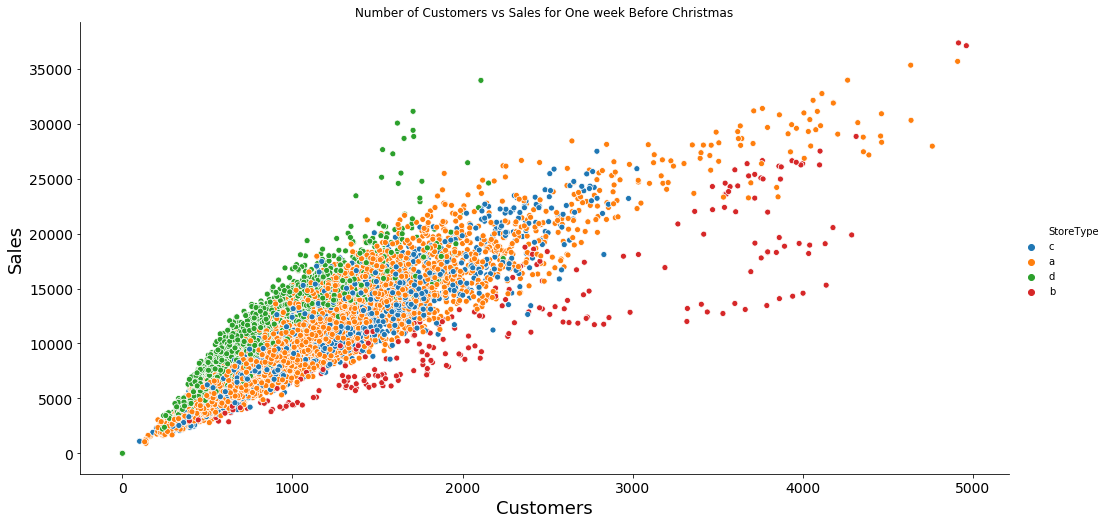

In [26]:
scatter_plot('Customers','Sales',one_week_before_xmas,\
             'Number of Customers vs Sales for One week Before Christmas','StoreType')

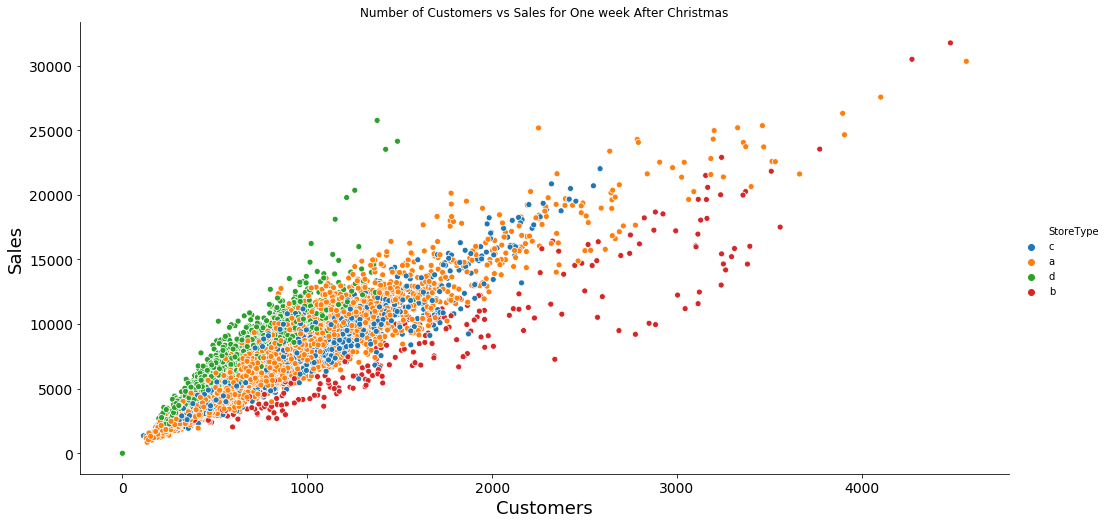

In [27]:
scatter_plot('Customers','Sales',one_week_after_xmas,\
             'Number of Customers vs Sales for One week After Christmas','StoreType')

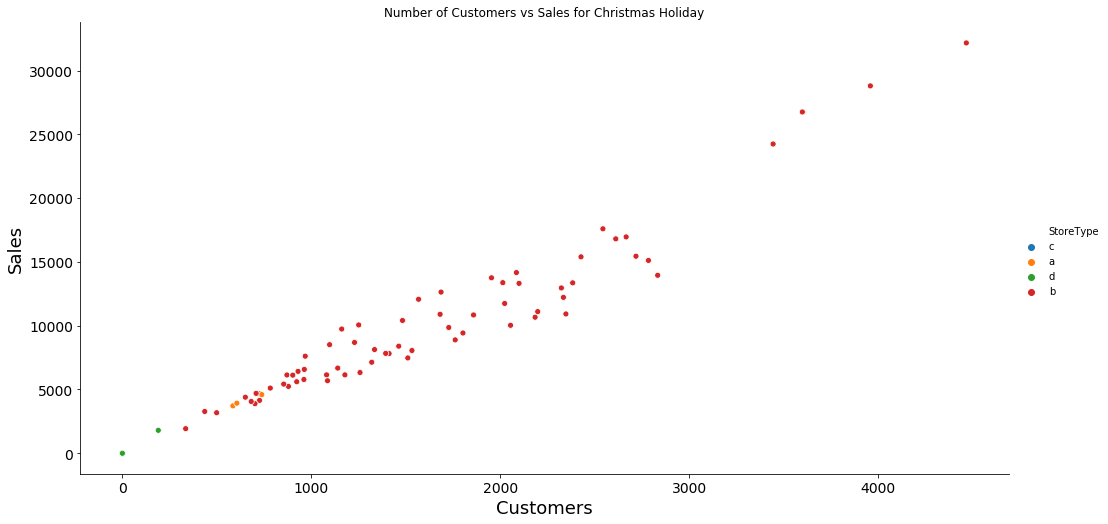

In [28]:
scatter_plot('Customers','Sales',xmas_sales,\
             'Number of Customers vs Sales for Christmas Holiday','StoreType')

Legend:
    a = public holiday,
    b = Easter holiday,
    c = Christmas,
    0 = None
# Inference:    

Store Type B has more sales and Customers during holidays

# Sales vs Promo

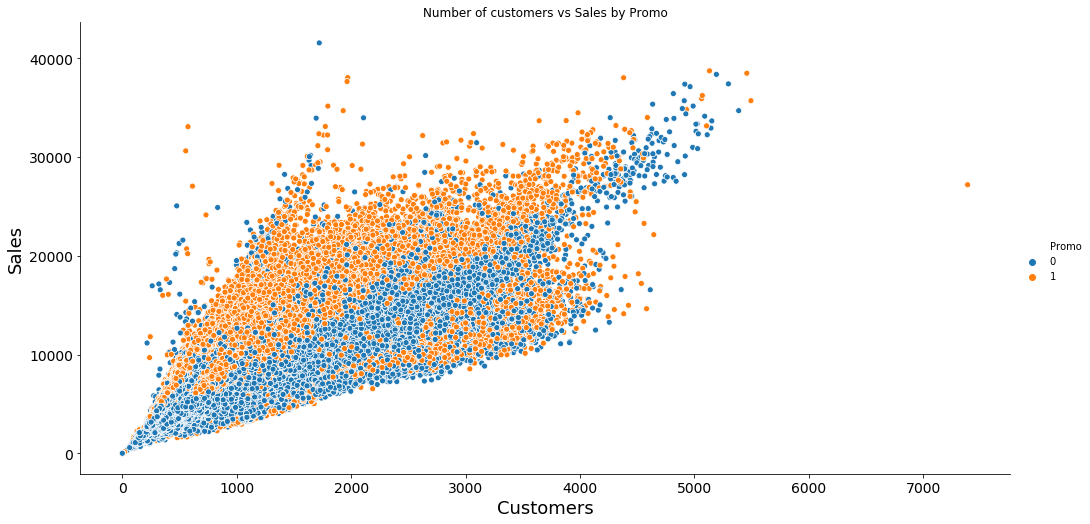

In [161]:
scatter_plot('Customers','Sales',db,'Number of customers vs Sales by Promo','Promo')

Legend : 0 = No Ongoing Promo,
    1 = Promo On

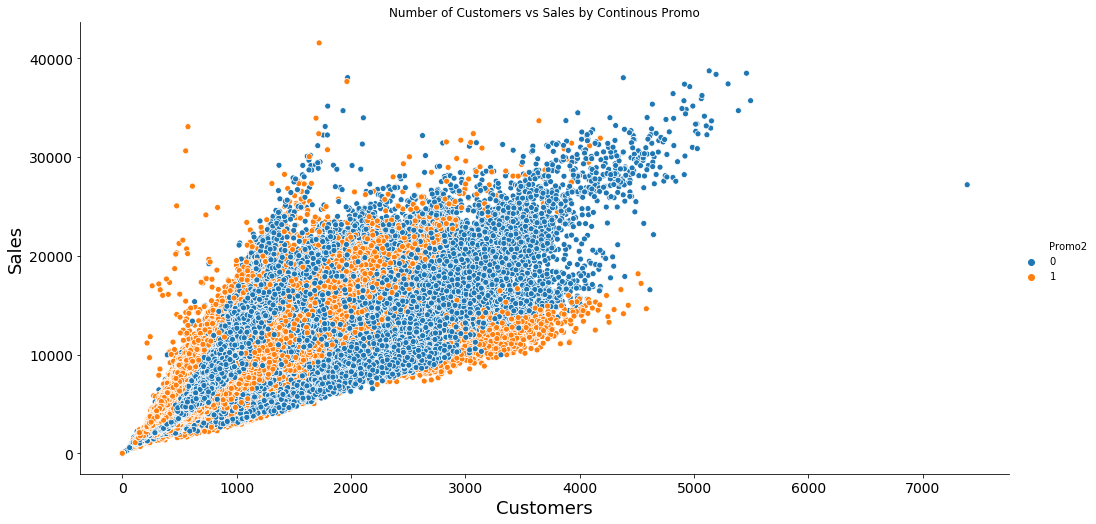

In [162]:
scatter_plot('Customers','Sales',db,'Number of Customers vs Sales by Continous Promo',"Promo2")

# Inference:

The plot shows that continous promos are responsible for a number of high sales with low number of customers and average sales for average number of customers

# Promo Effect on Certain Store Types

In [25]:
db['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [26]:
store_a = db[db['StoreType']=='a']
store_b = db[db['StoreType']=='b']
store_c = db[db['StoreType']=='c']
store_d = db[db['StoreType']=='d']

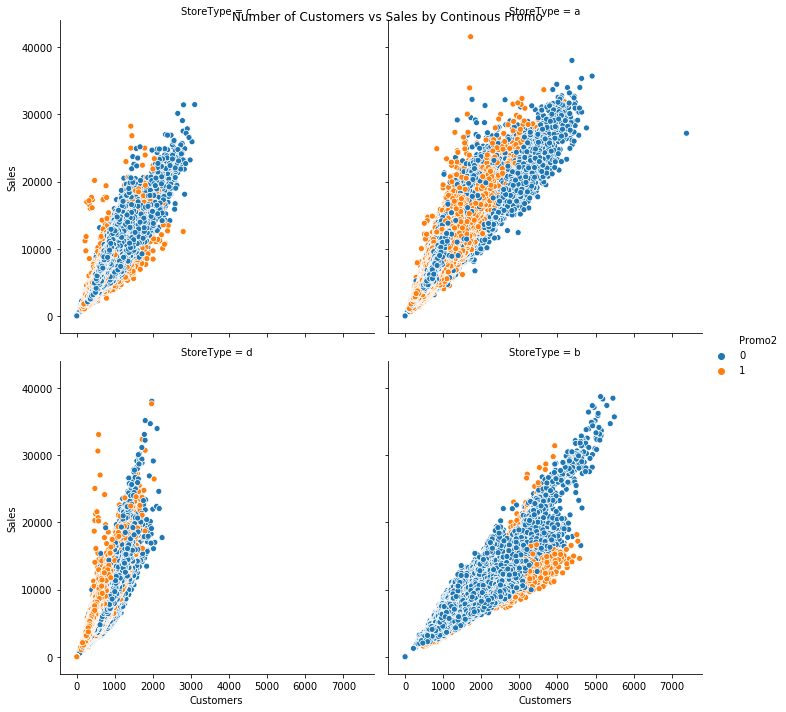

In [107]:
scatter_plot("Customers",'Sales',db,'Number of Customers vs Sales by Continous Promo','Promo2','StoreType')

# Inferences:

For Continous promo:

For Store Type a:More continous promos could be deployed
    
For Store Type b:
    
For Store Type b:
    Plot shows:
        - High Sales(between 17,000 & 35,000) over a range of Customers (2700 and 4500).
    
        - Increase in customers from <1000 to 5000 with sales less than 20,000.

For Store Type d:
    Sales increases  over a small range of Customers (between 0 and 3000 ).


Number of Customers vs Sales for Promo


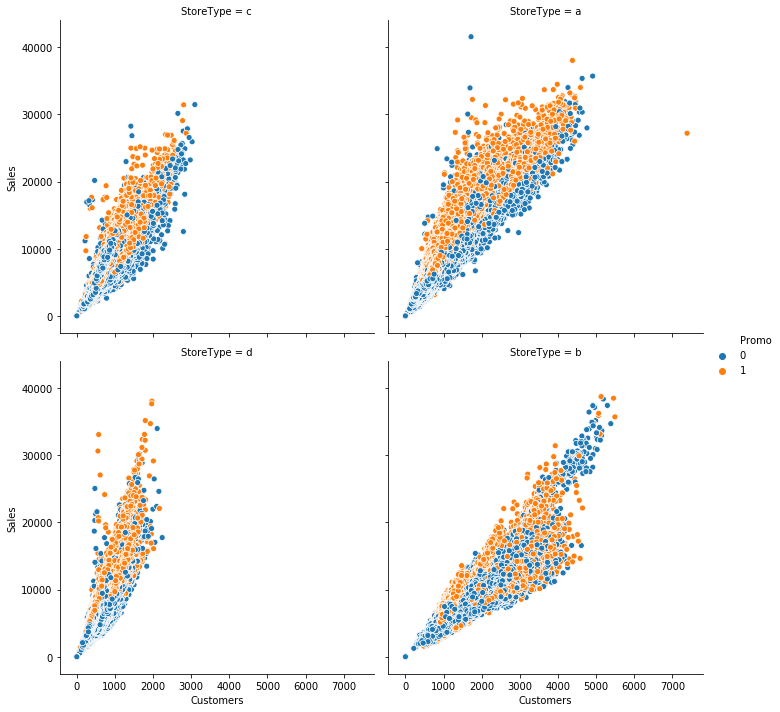

In [46]:
scatter_plot("Customers",'Sales',db,'Number of Customers vs Sales by Promo','Promo','StoreType')

# Inferences:

For promos:

Generally, the promos increase the sales and number of customers except for Store Type B

Promos should be deployed in store a,c,d
For Store Type a:

For Store Type b:

For Store Type b: More promos s

For Store Type d: 

# Exploring Sales by Store Open Days

In [108]:
db.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0,7,30


In [111]:
stores= db.groupby('Store').max()['DayOfWeek'].reset_index()

In [113]:
stores.shape

(1115, 2)

In [114]:
stores = stores[stores['DayOfWeek'] == 7]

In [115]:
stores.shape

(1115, 2)

# Exploring Sales by Store Assortment type

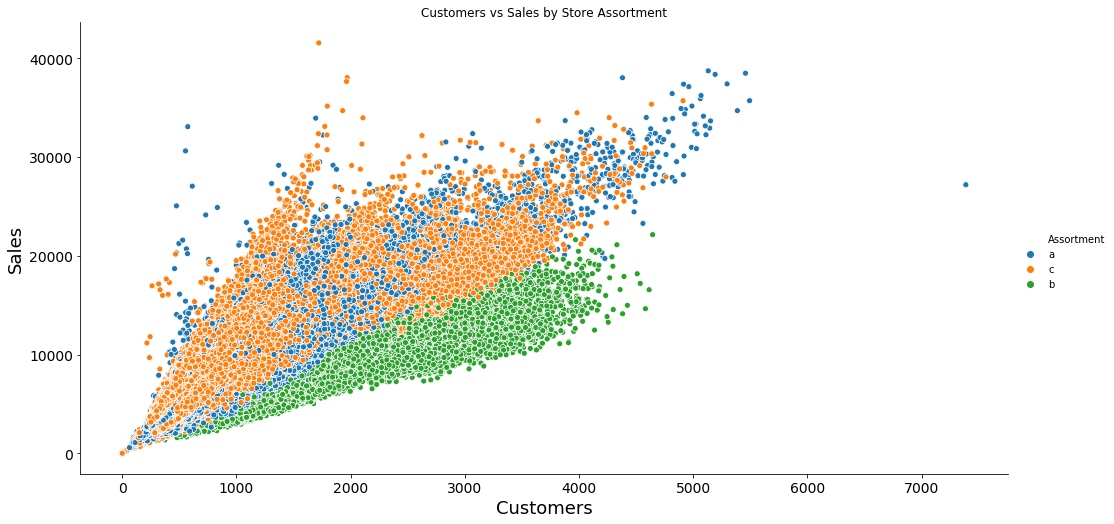

In [127]:
scatter_plot('Customers','Sales',db,'Customers vs Sales by Store Assortment','Assortment')

# Inferences:

Stores with Assortment Type a:
    - Plot shows one Outlier
    

Stores with Assortment Type b:
    - Plot shows a positive linear increase between Sales and Customers but it has a lower slope( Number of Customers increase at a faster rate than Sales) compared to other Assortment Types

# Exploring how Distance to Competition affect Sales

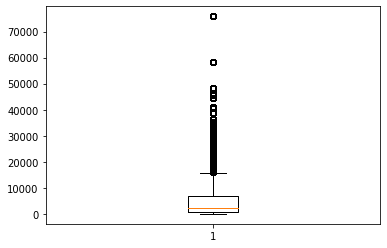

In [134]:
plt.boxplot(db['CompetitionDistance']);

The Competition Distance has an outlier

In [144]:
db['CompetitionDistance'].describe()

count    1.017209e+06
mean     5.415982e+03
std      7.710253e+03
min      0.000000e+00
25%      7.000000e+02
50%      2.320000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [157]:
db['CompetitionDistance'].quantile([0.45])

0.45    1980.0
Name: CompetitionDistance, dtype: float64

In [152]:
(1/3) * db['CompetitionDistance'].max()

25286.666666666664

In [154]:
db['Distance'] =pd.cut(db['CompetitionDistance'],bins=[0,1980,25286,75860],labels=['near','far','extremely far'])

In [155]:
db.sample(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Day,Distance
458548,503,4,2014-01-09,8647,588,1,1,0,0,d,...,13080.0,9.0,2006.0,1,14.0,2011,"Jan,Apr,Jul,Oct",1,9,far
839062,922,5,2015-07-31,8447,750,1,1,0,1,d,...,2110.0,3.0,2006.0,0,0.0,0,0,7,31,far
383352,421,7,2015-06-21,0,0,0,0,0,0,c,...,3530.0,6.0,2012.0,1,35.0,2012,"Mar,Jun,Sept,Dec",6,21,far
487879,535,2,2013-09-24,8573,974,1,1,0,0,a,...,3570.0,4.0,2007.0,0,0.0,0,0,9,24,far


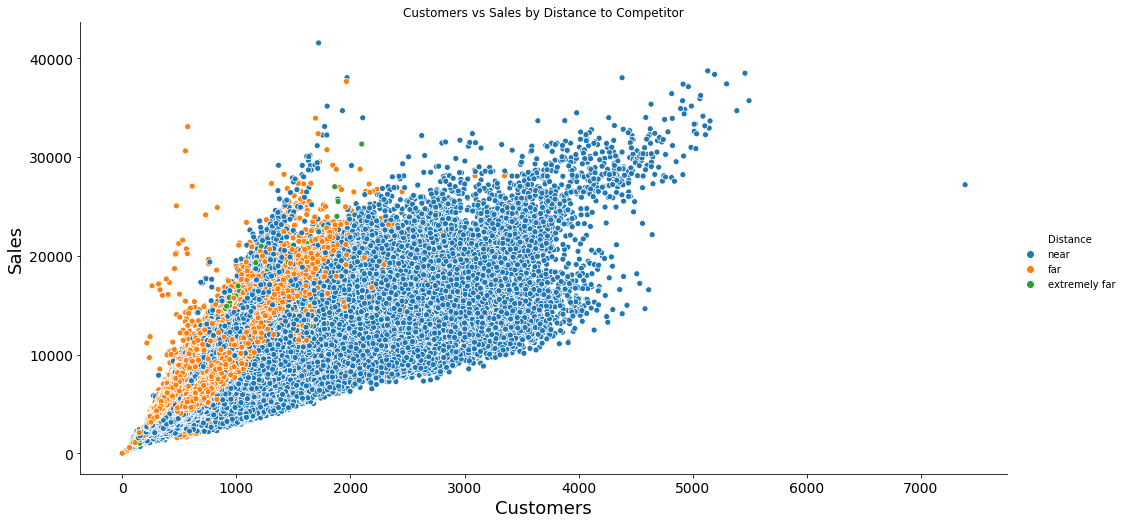

In [158]:
scatter_plot('Customers','Sales',db,'Customers vs Sales by Distance to Competitor','Distance')

# Inferences:

For Stores closer to Competitor with distance less than 1980m, there are more customers. 

Although generally, the relationship between sales and customers increases positively linearly, the distribution for Stores closer to Competitors have a smaller slope. 

In [43]:
db.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0,0,7,30


In [46]:
db.to_csv('../data/trainData.csv',index=False)

In [48]:
test.to_csv('../data/testData.csv',index=False)